# **Analisis de TC histórico**

In [6]:
# pip install pandas_datareader

In [7]:
# pip install yfinance

In [8]:
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

from datetime import datetime
# from forex_python.converter import CurrencyRates
import yfinance as yf


**Descarga de los datos de Tipo de Cambio.**


In [9]:
start_date = dt.datetime.today()- dt.timedelta(10000) 
end_date = dt.datetime.today()
stock ="USDMXN=X"
data = yf.download(stock, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [10]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,11.1776,11.4250,11.1776,11.358,11.358,0
2003-12-02,11.3605,11.3800,11.2740,11.290,11.290,0
2003-12-03,11.3605,11.3605,11.1860,11.245,11.245,0
2003-12-04,11.3550,11.3550,11.1590,11.188,11.188,0
2003-12-05,11.1860,11.2400,11.1230,11.197,11.197,0


In [11]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-10-04,19.335501,19.389910,19.110979,19.335501,19.335501,0
2024-10-08,19.289671,19.442280,19.222401,19.289671,19.289671,0
2024-10-09,19.345400,19.442659,19.305901,19.345400,19.345400,0
2024-10-10,19.467449,19.610279,19.429230,19.467449,19.467449,0
2024-10-11,19.438400,19.487249,19.375891,19.438400,19.438400,0


In [12]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5436.000000,5436.000000,5436.000000,5436.000000,5436.000000,5436.0
mean,15.303506,15.389767,15.222913,15.304287,15.304287,0.0
std,3.731482,3.760718,3.709506,3.731272,3.731272,0.0
min,9.866500,9.933700,9.834000,9.866500,9.866500,0.0
25%,11.971000,12.020875,11.923700,11.974000,11.974000,0.0
50%,13.676250,13.796100,13.559805,13.690700,13.690700,0.0
75%,18.934718,19.036368,18.839999,18.933798,18.933798,0.0
max,25.315100,25.765341,24.728029,25.336201,25.336201,0.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5436 entries, 2003-12-01 to 2024-10-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5436 non-null   float64
 1   High       5436 non-null   float64
 2   Low        5436 non-null   float64
 3   Close      5436 non-null   float64
 4   Adj Close  5436 non-null   float64
 5   Volume     5436 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 297.3 KB



Disponemos de informacion desde 2003-12-01 (diciembre 2003) al cierre del último día hábil. Esto representa un total de 5k registros para analizar el tipo de cambio. 

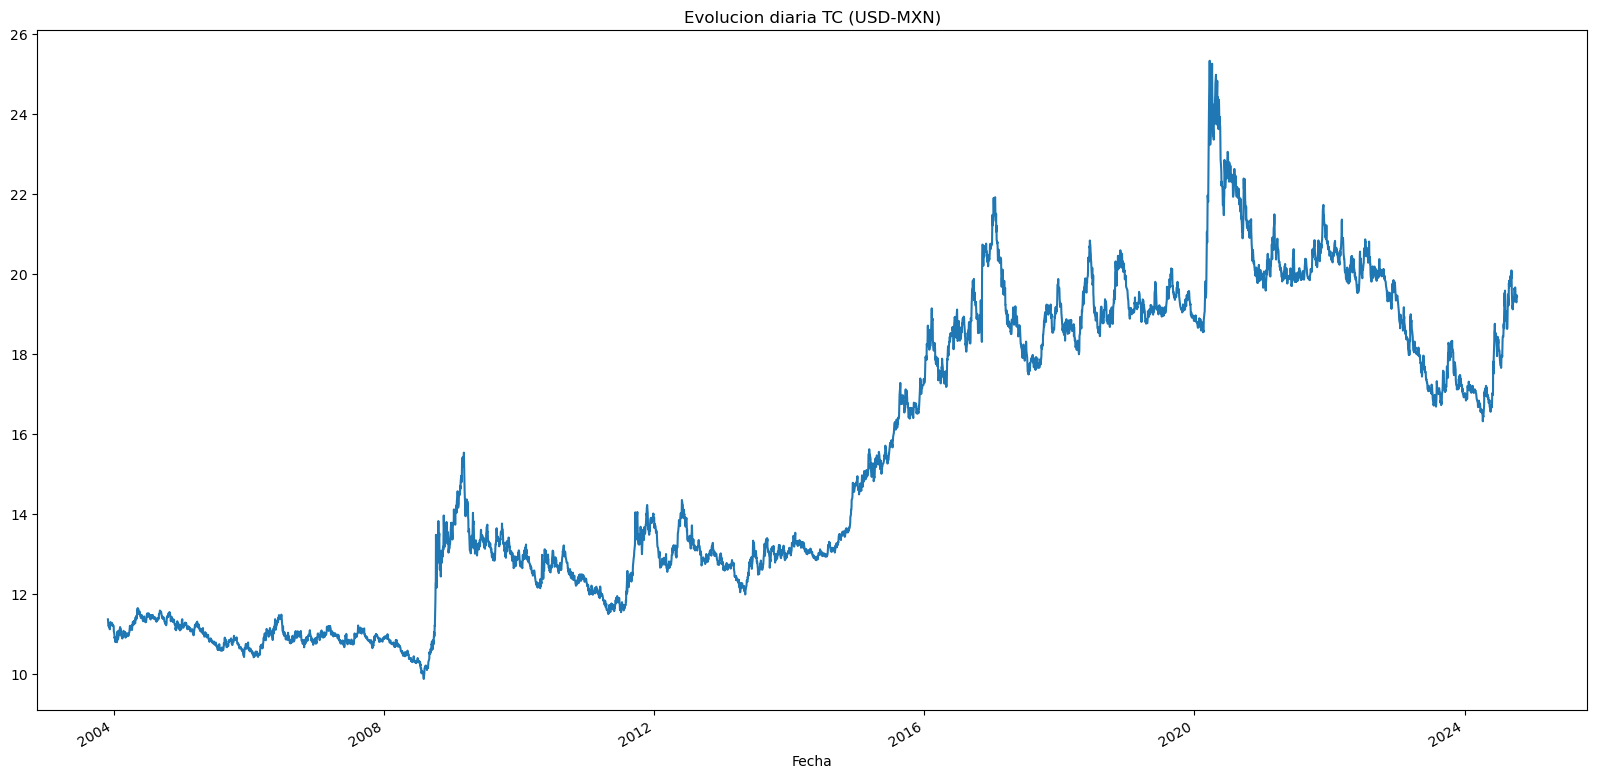

In [14]:
## Procedemos a graficar la informacion dispobible para analizar la completitud de la data. 

plt.figure(figsize=(20,10))
data['Adj Close'].plot()
plt.title('Evolucion diaria TC (USD-MXN)')
plt.xlabel('Fecha')
plt.show()


In [15]:
data['Adj Close'][-1]/data['Adj Close'][0]-1


/var/folders/y0/lp7dxz9n2d38f205956bf1fm0000gn/T/ipykernel_28428/1940461441.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['Adj Close'][-1]/data['Adj Close'][0]-1


0.7114281218560359

Observando de forma preliminar la grárica, podemos apreciar una evolución incremental constante del tipo de cambio. Respecto a la primera observación  la última, apreciamos un aumento de 73% en el tipo de cambio nominal. (diciembre 2003 vs oct 2024). 

Para complementar el análisis, analizaremos a la par informacion de inflacion, PIB y diversas variables macro economicas de interes. 


In [16]:
inpc = pd.read_csv('data/INPC_BASE_2018.csv')
inpc.head()

,ANO,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC
0,1969,0.011595,0.011636,0.011648,0.011680,0.011680,0.011721,0.011766,0.011779,0.011889,0.012014,0.012015,0.012106
1,1970,0.012198,0.012196,0.012232,0.012248,0.012274,0.012348,0.012409,0.012466,0.012496,0.012500,0.012568,0.012674
2,1971,0.012799,0.012852,0.012901,0.012967,0.012994,0.013053,0.013043,0.013162,0.013205,0.013218,0.013240,0.013303
3,1972,0.013362,0.013403,0.013476,0.013561,0.013588,0.013689,0.013740,0.013831,0.013894,0.013904,0.013994,0.014042
4,1973,0.014246,0.014363,0.014490,0.014719,0.014876,0.014998,0.015382,0.015629,0.016001,0.016206,0.016406,0.017043


In [17]:
inpc.tail()

,ANO,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC
51,2020,106.447,106.889,106.838,105.755,106.162,106.743,107.444,107.867,108.114,108.774,108.856,109.271
52,2021,110.210,110.907,111.824,112.190,112.419,113.018,113.682,113.899,114.601,115.561,116.884,117.308
53,2022,118.002,118.981,120.159,120.809,121.022,122.044,122.948,123.803,124.571,125.276,125.997,126.478
54,2023,127.336,128.046,128.389,128.363,128.084,128.214,128.832,129.545,130.120,130.609,131.445,132.373
55,2024,133.555,133.681,134.065,134.336,134.087,134.594,136.003,136.013,NaN,NaN,NaN,NaN


La base descargada contiene los valores del INPC (indexados a 2018) desde 1969 hasta agosto 2024.Con esta data podemos proceder a analizar la evolucion mensual de la inflacion. 

In [18]:
# Indenxaremos los valores para poder acceder a ellos de for iterativa.
inpc.set_index('ANO', inplace=True)
inpc.head()

,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC
ANO,,,,,,,,,,,,
1969,0.011595,0.011636,0.011648,0.011680,0.011680,0.011721,0.011766,0.011779,0.011889,0.012014,0.012015,0.012106
1970,0.012198,0.012196,0.012232,0.012248,0.012274,0.012348,0.012409,0.012466,0.012496,0.012500,0.012568,0.012674
1971,0.012799,0.012852,0.012901,0.012967,0.012994,0.013053,0.013043,0.013162,0.013205,0.013218,0.013240,0.013303
1972,0.013362,0.013403,0.013476,0.013561,0.013588,0.013689,0.013740,0.013831,0.013894,0.013904,0.013994,0.014042
1973,0.014246,0.014363,0.014490,0.014719,0.014876,0.014998,0.015382,0.015629,0.016001,0.016206,0.016406,0.017043


In [48]:
inpc.tail()

,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC
ANO,,,,,,,,,,,,
2020,106.447,106.889,106.838,105.755,106.162,106.743,107.444,107.867,108.114,108.774,108.856,109.271
2021,110.210,110.907,111.824,112.190,112.419,113.018,113.682,113.899,114.601,115.561,116.884,117.308
2022,118.002,118.981,120.159,120.809,121.022,122.044,122.948,123.803,124.571,125.276,125.997,126.478
2023,127.336,128.046,128.389,128.363,128.084,128.214,128.832,129.545,130.120,130.609,131.445,132.373
2024,133.555,133.681,134.065,134.336,134.087,134.594,136.003,136.013,NaN,NaN,NaN,NaN


In [20]:
for c in inpc.columns:
    inpc[c] = inpc[c].astype(float)

In [21]:
# Con los valores indexados, podemos calcular la inflacion puntual de un mes vs otro. 
(inpc['FEB'][1969]/inpc['ENE'][1969] - 1)*100

0.35895277554498506

In [22]:
# De igual forma, se pueden extraer los valores de inflacion anual
(inpc['ENE'][2023]/inpc['ENE'][2022] - 1)*100


7.910035423128425

## **Transformacion de los datos**

1. Será necesario procesar la data que tenemos del INPC para poder extraer la tasa mensual de inflación.
2. Si queremos agregar variables complementrias al análisis, será necesario procesar la serie de TC, para que ésta la tengamos de forma mensual. Podemos tener diversos abordajes: 
    * Tomar el valor promedio mensual de la serie.
    * Tomar el valor máximo observado de la serie.
    * Tomar la varianza mensual de la serie para estimar volatilidad...

### **Adecuacion de la informacion mensual de inflación para EEUU y MX**

Procesaremos la data para juntarla en un mismo DF; lo cual nos permetirá el asegurarnos que tenemos los mismos periodos comparables entre ambas series de tiempo.

In [23]:
## Generamos un diccionario con los valores mensuales de inflacion con base en la data de inpc.

# Año de inicio de la data de TC de MX.
year = 2004

# Creamos diccionario vacio
inpc_ann  = defaultdict()

# Creamos una bandera de parada para los casos donde el proceso no encuentre valores comparables de inflación
stop = False 


#Iniciamos la valuación mensual de inflación
for y_act in range (year, 2025):
    
    if stop:
        break

    for index,month in enumerate(inpc.columns):

        # Detenemos el proceso si no se encuentra el valor del año/mes dentro del DF de INPC.
        if pd.isnull(inpc[month][y_act]) == True:

            stop = True # Activación de la bandera.
            break

        # Creamos una llave para el diccionario inpc_ann
        if index<9: 
            key = str(y_act) +'-0'+ str(np.sum(index+1))+'-01'
        else: 
            key = str(y_act) +'-'+ str(np.sum(index+1))+'-01'

        # Llenamos el diccionario
        inpc_ann[key] = (inpc[month][y_act]/inpc[month][(y_act-1)]-1)*100



Ya contamos con una serie con el valor mensual de la inflación en MX, procederemos a hacer un DF con el mismo para una mejor manipulación de la data. 

In [41]:
## Observamos un ejemplo de los valores contenidos en el diccionario.
list(inpc_ann.items())[:5]

[('2004-01-01', 4.201509864150066),
 ('2004-02-01', 4.534442667911764),
 ('2004-03-01', 4.230728665625083),
 ('2004-04-01', 4.210113074608546),
 ('2004-05-01', 4.285220261278999)]

In [25]:
## Transformamos el diccionario en un pandas DF.
inf_mx = pd.DataFrame.from_dict(inpc_ann, orient = 'index')
inf_mx.columns = ['ANN_INF']
inf_mx

,ANN_INF
2004-01-01,4.201510
2004-02-01,4.534443
2004-03-01,4.230729
2004-04-01,4.210113
2004-05-01,4.285220
...,...
2024-04-01,4.653210
2024-05-01,4.686768
2024-06-01,4.976056
2024-07-01,5.566164


**Extraemos los datos de inflacion de US**

In [26]:
cpi = pd.read_csv("data/CPI_ANNUAL.csv")
cpi.head()

,MONTH,All_items,Food,Food at home,Food away from home,Energy,Gasoline (all types),Electricity,Natural gas (piped),All items less food and energy,Commodities less food and energy commodities,Apparel,New vehicles,Medical care commodities,Services less energy services,Shelter,Medical care services,Education and communication
0,2004-09-01,2.5,3.3,3.3,3.3,6.7,9.6,1.6,6.2,2.0,-0.6,-0.7,-1.1,2.3,3.0,3.0,5.0,1.8
1,2004-10-01,3.2,3.4,3.5,3.3,15.2,26.6,0.9,8.0,2.0,0.1,-0.6,-0.4,2.6,2.8,2.7,5.1,1.4
2,2004-11-01,3.5,3.2,3.1,3.2,19.2,30.9,2.3,17.1,2.2,0.5,-0.1,0.3,2.7,2.8,2.7,5.0,1.7
3,2004-12-01,3.3,2.7,2.4,3.0,16.6,26.1,2.1,16.4,2.2,0.6,-0.2,0.6,2.2,2.8,2.7,4.9,1.5
4,2005-01-01,3.0,2.9,2.7,3.2,10.6,14.3,3.5,11.2,2.3,0.9,0.3,1.3,2.3,2.8,2.7,5.0,1.4


In [28]:
# Convertimos el mes en un índice
cpi.set_index('MONTH', inplace = True)

In [42]:
## Generamos un nuevo DF que contenga la informaciión sobre inflacion mensual de cada uno de los países 
inf_cruz = pd.merge(inf_mx[['ANN_INF']],cpi[['All_items']],left_index=True, right_index=True, how = 'left' )
inf_cruz.columns = ['INF_MX', 'INF_EU']
inf_cruz.dropna(inplace = True)
inf_cruz.head()

,INF_MX,INF_EU
2004-09-01,5.060081,2.5
2004-10-01,5.401236,3.2
2004-11-01,5.425294,3.5
2004-12-01,5.190848,3.3
2005-01-01,4.544821,3.0


In [43]:
# Para mejor manipulacion de lsa fechas, convertimos el indice a un datetime
inf_cruz.index = pd.to_datetime(inf_cruz.index)


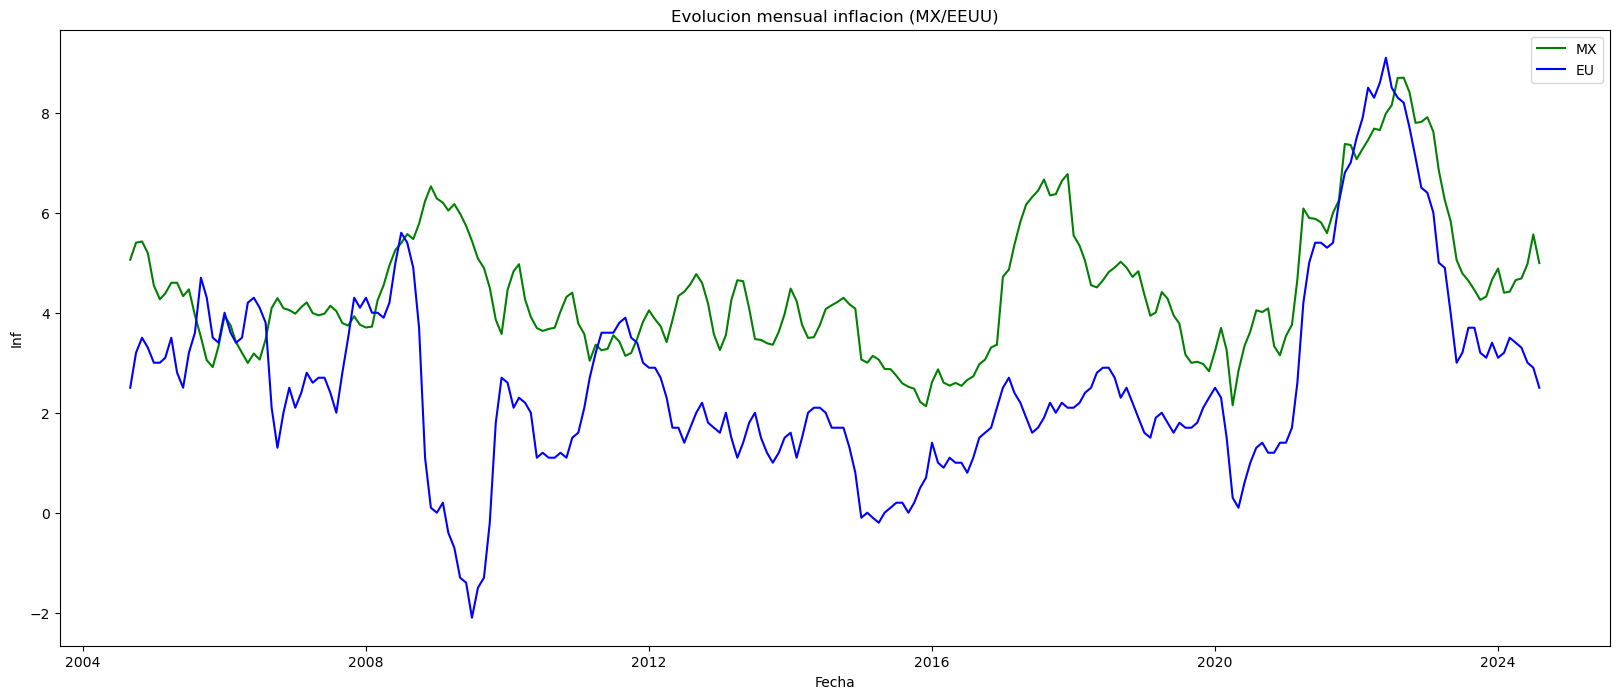

In [44]:
# Generamos una gráfica de la inflacion "cruzada" para validar que contenemos información de aambas series.
plt.figure(figsize = (20,8))
plt.title('Evolucion mensual inflacion (MX/EEUU)')
plt.xlabel('Fecha')
plt.ylabel('Inf')
plt.plot(inf_cruz.index, inf_cruz['INF_MX'], label = 'MX', color = 'green')
plt.plot(inf_cruz.index, inf_cruz['INF_EU'], label = 'EU', color = 'blue')
plt.legend()
plt.show()

### **Transformación de los valores de TC**

Retomando la data del TC, recordemos que tenemos la información **Diaria** por lo cual, no podría ser comparable contra los demás índices (inflación).

Para esta sección, procesaremos la data de inflación para convertira a diversas temporalidades. 

In [45]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,11.1776,11.4250,11.1776,11.358,11.358,0
2003-12-02,11.3605,11.3800,11.2740,11.290,11.290,0
2003-12-03,11.3605,11.3605,11.1860,11.245,11.245,0
2003-12-04,11.3550,11.3550,11.1590,11.188,11.188,0
2003-12-05,11.1860,11.2400,11.1230,11.197,11.197,0


Tomaremos el valor más alto observado durante el mes, ya que nos da mayor detalle acerca de la volatilidad en el largo plazo. Tomar el promedio de los TC, podría mitigar la severidad. A su vez, al ser valores de cierre diarios nos da la certeza de que el valor, por alto que sea sí estuvo vigente durante el mes. 

In [56]:
data_men = data.resample('M').max()
data_men.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-31,11.3605,11.425,11.274,11.358,11.358,0
2004-01-31,11.2223,11.256,11.191,11.191,11.191,0
2004-02-29,11.1820,11.285,11.095,11.165,11.165,0
2004-03-31,11.1990,11.235,11.153,11.196,11.196,0
2004-04-30,11.4225,11.465,11.344,11.412,11.412,0


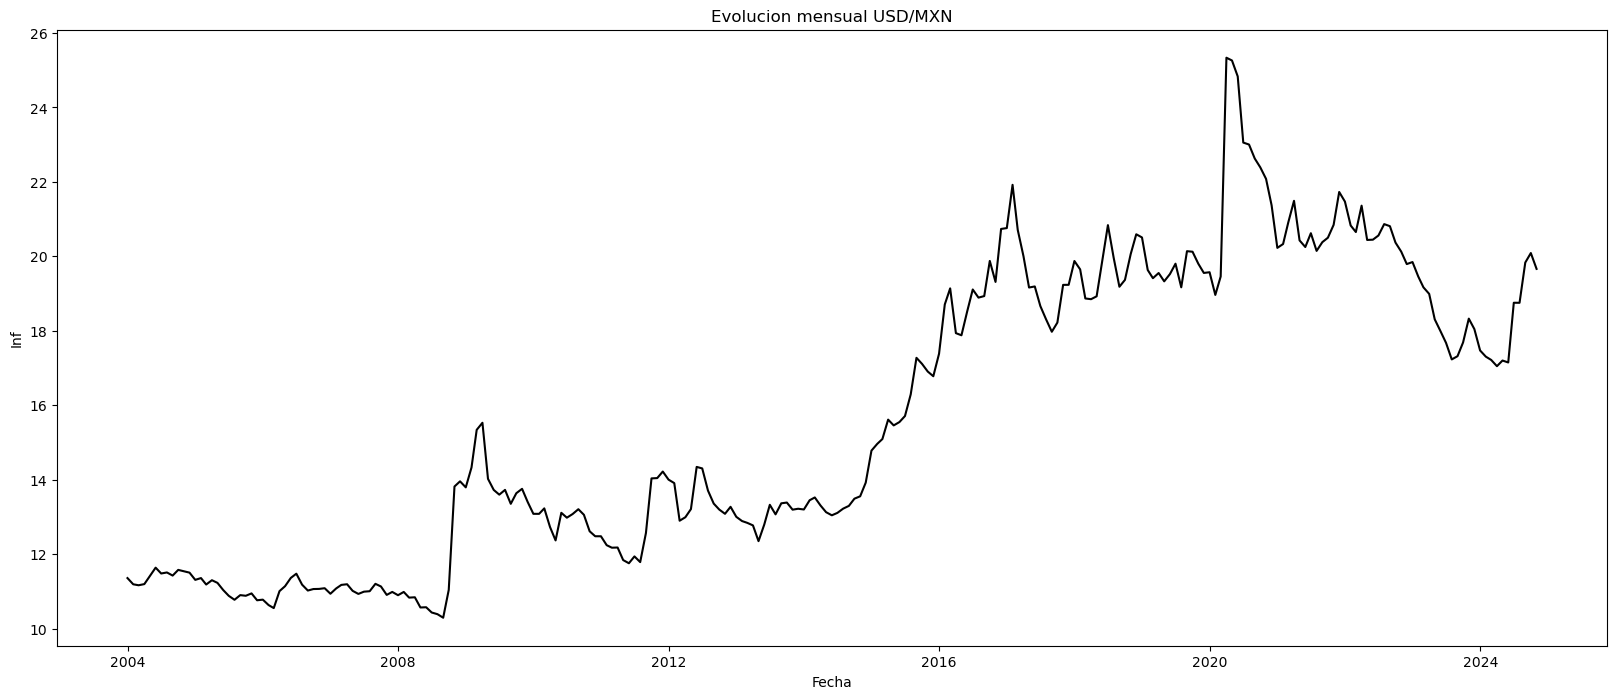

In [57]:
# Generamos una gráfica de la inflacion
plt.figure(figsize = (20,8))
plt.title('Evolucion mensual USD/MXN')
plt.xlabel('Fecha')
plt.ylabel('Inf')
plt.plot(data_men.index, data_men['Adj Close'], label = 'MX', color = 'black')
plt.show()

El paso adixional que queda es el de homologar las fechas del DF de TC. Las observaciones se dan solamente en días hábiles, por lo que al hacer el resampleo para observaciones mensuales, nos quedamos con el primer día observado en el mes como el índice, sin embargo, es probable que no cuadre contra los valores de índices en el DF de inflación. Procederemos a hacer un ajuste. 

In [58]:
# Reemplazar el día de cada fecha por el primer día del mes correspondiente
data_men.index = data_men.index.to_period('M').to_timestamp('D', how='start')
data_men.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,11.3605,11.425,11.274,11.358,11.358,0
2004-01-01,11.2223,11.256,11.191,11.191,11.191,0
2004-02-01,11.1820,11.285,11.095,11.165,11.165,0
2004-03-01,11.1990,11.235,11.153,11.196,11.196,0
2004-04-01,11.4225,11.465,11.344,11.412,11.412,0


De esta forma, podemos ahora juntar los 3 indicadores. 

In [59]:
inf_cruz = pd.merge(inf_cruz, data_men[['Adj Close']], left_index= True, right_index= True)
inf_cruz.head()

,INF_MX,INF_EU,Adj Close
2004-09-01,5.060081,2.5,11.578
2004-10-01,5.401236,3.2,11.540
2004-11-01,5.425294,3.5,11.504
2004-12-01,5.190848,3.3,11.310
2005-01-01,4.544821,3.0,11.358


In [60]:
# Cambiamos los nombres del DF para tener más claridad.
inf_cruz.columns = ['INF_MX', 'INF_EU', 'TC']

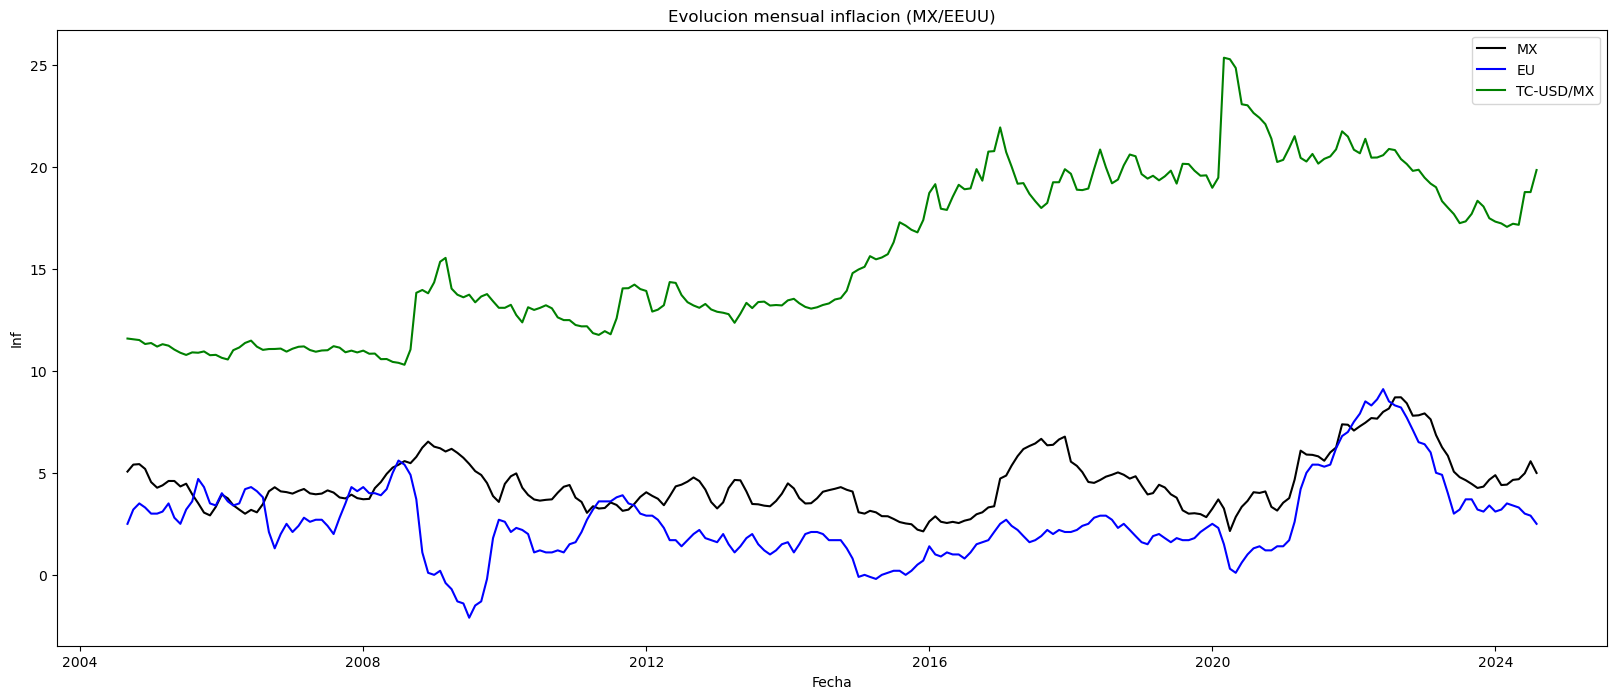

In [65]:
# Inspeccionamos el resultado de juntar los DF con la información.

plt.figure(figsize = (20,8))
plt.title('Evolucion mensual inflacion (MX/EEUU)')
plt.xlabel('Fecha')
plt.ylabel('Inf')
plt.plot(inf_cruz.index, inf_cruz['INF_MX'], label = 'MX', color = 'black')
plt.plot(inf_cruz.index, inf_cruz['INF_EU'], label = 'EU', color = 'blue')
plt.plot(inf_cruz.index, inf_cruz['TC'], label = 'TC-USD/MX', color = 'green')
plt.legend()
plt.show()

## **Análisis de Datos**

Observamos un periodo peculiar donde la inflación de EEUU estuvo por debajo de 0, lo resaltaremos en la gráfica para no perder de vista este detalle. 

In [34]:
inf_cruz[inf_cruz['INF_EU']<0]

,INF_MX,INF_EU
2009-03-01,6.043723,-0.4
2009-04-01,6.173274,-0.7
2009-05-01,5.978525,-1.3
2009-06-01,5.736118,-1.4
2009-07-01,5.436538,-2.1
2009-08-01,5.081960,-1.5
2009-09-01,4.894258,-1.3
2009-10-01,4.499498,-0.2
2015-01-01,3.065642,-0.1
2015-03-01,3.137075,-0.1


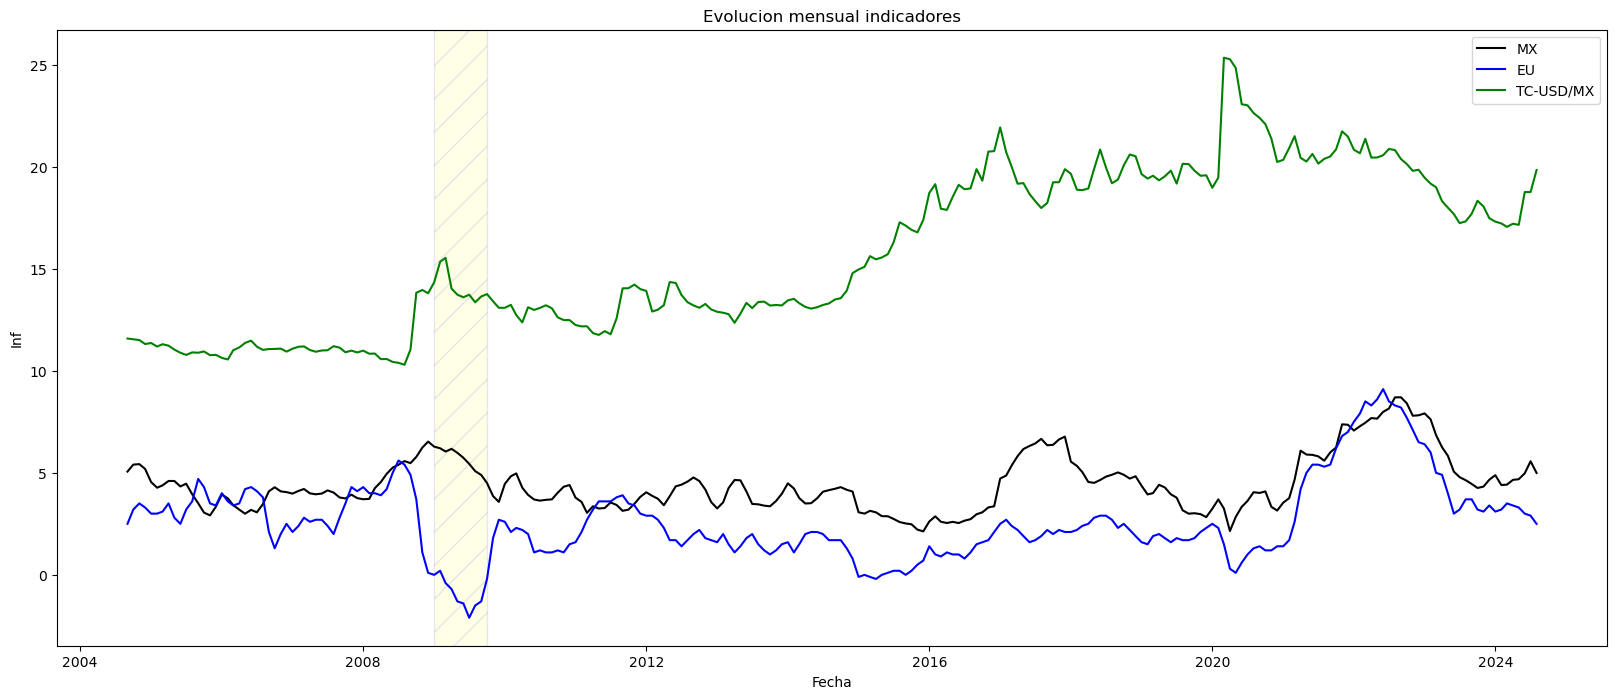

In [66]:
# Generamos una gráfica de la inflacion
plt.figure(figsize = (20,8))
plt.title('Evolucion mensual indicadores')
plt.xlabel('Fecha')
plt.ylabel('Inf')
plt.plot(inf_cruz.index, inf_cruz['INF_MX'], label = 'MX', color = 'black')
plt.plot(inf_cruz.index, inf_cruz['INF_EU'], label = 'EU', color = 'blue')
plt.plot(inf_cruz.index, inf_cruz['TC'], label = 'TC-USD/MX', color = 'green')
plt.legend()

plt.axvspan(datetime(2009, 1, 1), datetime(2009, 10, 1), facecolor='yellow', alpha=0.1, hatch='/', edgecolor='blue', linewidth=1)

plt.legend()
plt.show()

De primera instancia, podemos apreciar los niveles de inflacion en México vs EEUU se mueven en un mismo sentido, sin embargo, en México son más altos. Es en los últimos 4 años que se ha dado una mayor paridad en el indicador. Se aprecia que para México existe una mayor **volatilidad**. 


In [67]:
inf_cruz.describe()

,INF_MX,INF_EU,TC
count,240.000000,240.000000,240.000000
mean,4.457330,2.597500,15.784887
std,1.356535,1.944823,3.876075
min,2.130813,-2.100000,10.293000
25%,3.506589,1.500000,12.547525
50%,4.193345,2.200000,14.336700
75%,5.023533,3.500000,19.425049
max,8.699750,9.100000,25.336201
